In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')

x_train /= 255
x_test /= 255

n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)


model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

model.compile(loss='mean_squared_error', 
       optimizer=optimizers.SGD(learning_rate=0.01),
       metrics=['accuracy'])

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
model.fit(x_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(x_test, y_test))

Epoch 1/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0948 - accuracy: 0.1012 - val_loss: 0.0934 - val_accuracy: 0.1164
Epoch 2/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0928 - accuracy: 0.1234 - val_loss: 0.0920 - val_accuracy: 0.1419
Epoch 3/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0917 - accuracy: 0.1392 - val_loss: 0.0911 - val_accuracy: 0.1518
Epoch 4/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0909 - accuracy: 0.1481 - val_loss: 0.0905 - val_accuracy: 0.1591
Epoch 5/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0903 - accuracy: 0.1556 - val_loss: 0.0899 - val_accuracy: 0.1674
Epoch 6/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0898 - accuracy: 0.1638 - val_loss: 0.0894 - val_accuracy: 0.1751
Epoch 7/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0893 - accuracy: 0.1767 - val_loss: 0.0890 - val_accuracy: 0.1947

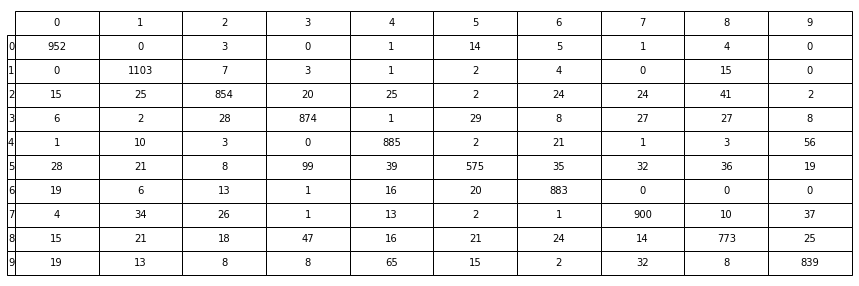

In [37]:
import pandas as pd

x_pr = model.predict(x_test[0:10000])
data = np.zeros((10,10), dtype='i4') 

for i in range(10000):
  xD=np.argmax(x_pr[i])
  yD=np.argmax(y_test[i])

  data[yD][xD]+=1
col=[]
row=[]

for i in range(0,10):
  col.append(i)
  row.append(i)


plt.figure(figsize=(15,5))
tab = plt.table(cellText=data,
        colLabels=col,
        rowLabels=row,
        cellLoc='center', 
        loc='center'
        )

tab.scale(1,2)
plt.axis('off')

plt.show()



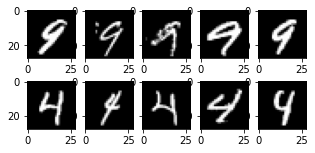

數字9容易被辨識成4 ，錯誤辨識次數為 65 



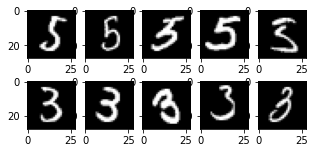

數字5容易被辨識成3 ，錯誤辨識次數為 99 



In [48]:
from random import sample

MaxErr = [0,0]
XErr = [11,11]
YErr = [11,11]

for x in range(10):
  for y in range(10):
      value=np.min(MaxErr)
      if x!=y and data[y][x]>value:
        index = MaxErr.index(value)
        MaxErr[index] = data[y][x]
        XErr[index] = x
        YErr[index] = y


for ind in range(2):
  AccN=[]
  prN=[]
  for i in range(10000):
    xD=np.argmax(x_pr[i])
    yD=np.argmax(y_test[i])

    if yD==XErr[ind]:
      prN.append(i)

    if xD==XErr[ind] and yD==YErr[ind]:
      AccN.append(i)

  AccN5 = sample(AccN,5)
  prN5 = sample(prN,5)

  plt.figure(figsize=(5,5))

  for j in range(5):
    plt.subplot(4, 5 ,j+1)
    plt.imshow(x_test[AccN5[j]].reshape((28,28)), cmap='gray')
  for j in range(5):
    plt.subplot(4, 5 ,j+1+5)
    plt.imshow(x_test[prN5[j]].reshape((28,28)), cmap='gray')
  
  plt.show()

  Xprint=XErr[ind]
  Yprint=YErr[ind]
  print("數字{}容易被辨識成{} ，錯誤辨識次數為 {} \n".format(Yprint,Xprint,MaxErr[ind]))

